# <u> Supervised Learning Project</u>

#### Submitter - Sushant Kumar Gadi(sushantgadi@gmail.com)

In [1]:
# Importing all the required libraries for the project
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency,f_oneway
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import math


## PART A : 30 Marks

### DOMAIN: Healthcare
### CONTEXT: 
Medical research university X is undergoing a deep research on patients with certain conditions.
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by
the client by providing different datasets to the AI team for developing a AIML model which can predict the
condition of the patient depending on the received test results.
#### DATA DESCRIPTION: 
The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.
#### PROJECT  OBJECTIVE: 
To  Demonstrate  the  ability  to  fetch,  process  and  leverage  data  to  generate  useful  predictions   by  training  Supervised Learning algorithms.

#### Data Understanding: [5 Marks]

In [2]:
#A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark] 
normal_data = pd.read_csv("Part1_Normal.csv")
type_h_data = pd.read_csv("Part1_Type_H.csv")
type_s_data = pd.read_csv("Part1_Type_S.csv")

In [3]:
# B. Print Shape and columns of all the 3 DataFrames. [1 Mark] 
print("Size of normal data:",normal_data.shape)
print("Size of type h data:",type_h_data.shape)
print("Size of type s data:",type_s_data.shape)

Size of normal data: (100, 7)
Size of type h data: (60, 7)
Size of type s data: (150, 7)


##### C. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]

##### My Observation: As there are no null values present, and all the datasets have the same number of columns, identical data types, and matching column names, it is secure to combine/merge the three datasets.

In [4]:
# D. Print DataTypes of all the 3 DataFrames. [1 Mark] 

print("Normal Data - Column details")
normal_data.info()

Normal Data - Column details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [5]:
print("Type H Data - Column details")
type_h_data.info()

Type H Data - Column details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [6]:
print("Type S Data - Column details")
type_s_data.info()

Type S Data - Column details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [7]:
#E. Observe and share variation in ‘Class’ feature of all the 3 DataFrames. [1 Mark]
# Answer : These are the values in the 'Class' feature : Normal, Nrmal, Type_H, type_h, Type_S and tp_s.

normal_data_unique_values = normal_data['Class'].unique()
print("normal_data_unique_values=", normal_data_unique_values)

type_h_data_unique_values = type_h_data['Class'].unique()
print("type_h_data_unique_values=", type_h_data_unique_values)

type_s_dataunique_values = type_s_data['Class'].unique()
print("type_s_dataunique_values=", type_s_dataunique_values)

normal_data_unique_values= ['Normal' 'Nrmal']
type_h_data_unique_values= ['Type_H' 'type_h']
type_s_dataunique_values= ['Type_S' 'tp_s']


#### 2. Data Preparation and Exploration: [5 Marks]

In [8]:
# A.Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]
# For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’

# Define the replacement mapping
replacement_mapping = {'tp_s': 'type_s', 'Type_S': 'type_s', 'Normal': 'normal', 'Nrmal': 'normal', 'Type_H': 'type_h'}

# Replace the values in the 'Column_Name' column
normal_data['Class'] = normal_data['Class'].replace(replacement_mapping)
type_h_data['Class'] = type_h_data['Class'].replace(replacement_mapping)
type_s_data['Class'] = type_s_data['Class'].replace(replacement_mapping)

# Check the unique values again
normal_data_unique_values = normal_data['Class'].unique()
print("normal_data_unique_values=", normal_data_unique_values)

type_h_data_unique_values = type_h_data['Class'].unique()
print("type_h_data_unique_values=", type_h_data_unique_values)

type_s_dataunique_values = type_s_data['Class'].unique()
print("type_s_dataunique_values=", type_s_dataunique_values)

print(normal_data.head)


normal_data_unique_values= ['normal']
type_h_data_unique_values= ['type_h']
type_s_dataunique_values= ['type_s']
<bound method NDFrame.head of     P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0     38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  normal
1     54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  normal
2     44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  normal
3     48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  normal
4     45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  normal
..          ...        ...        ...        ...         ...       ...     ...
95    47.903565  13.616688  36.000000  34.286877  117.449062 -4.245395  normal
96    53.936748  20.721496  29.220534  33.215251  114.365845 -0.421010  normal
97    61.446597  22.694968  46.170347  38.751628  125.670725 -2.707880  normal
98    45.252792   8.693157  41.583126  36.559635  118.545842  0.214

In [9]:

print(type_h_data.head)

<bound method NDFrame.head of     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
0     63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1     39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2     68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3     69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4     49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   
5     40.250200  13.921907  25.124950  26.328293  130.327871   2.230652   
6     53.432928  15.864336  37.165934  37.568592  120.567523   5.988551   
7     45.366754  10.755611  29.038349  34.611142  117.270067 -10.675871   
8     43.790190  13.533753  42.690814  30.256437  125.002893  13.289018   
9     36.686353   5.010884  41.948751  31.675469   84.241415   0.664437   
10    49.706610  13.040974  31.334500  36.665635  108.648265  -7.825986   
11    31.232387  17.715819  15.500000  13.516568  120.055399   0.49975

In [10]:
print(type_s_data.head)

<bound method NDFrame.head of      P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
0      74.377678  32.053104  78.772013  42.324573  143.560690   56.125906   
1      89.680567  32.704435  83.130732  56.976132  129.955476   92.027277   
2      44.529051   9.433234  52.000000  35.095817  134.711772   29.106575   
3      77.690577  21.380645  64.429442  56.309932  114.818751   26.931841   
4      76.147212  21.936186  82.961502  54.211027  123.932010   10.431972   
..           ...        ...        ...        ...         ...         ...   
145    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
146    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
147    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
148    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
149    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
0    type_s  
1    type_s  
2  

In [11]:
#B. Combine all the 3 DataFrames to form a single DataFrame [1 Marks] 
#Checkpoint: Expected Output shape = (310,7) 
med_data = normal_data.append([type_h_data, type_s_data])
med_data.shape

/var/folders/wc/dnnrch656qx3fy0mzlyd0509jjppq1/T/ipykernel_34690/2654761788.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  med_data = normal_data.append([type_h_data, type_s_data])


(310, 7)

In [12]:
# C. Print 5 random samples of this DataFrame [1 Marks]
# Use the 'sample' function to get 5 random samples
random_samples = med_data.sample(n=5)

# Print the random samples
print(random_samples)

    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
43    63.792425  21.345323  66.000000  42.447102  119.550391  12.382604   
0     38.505273  16.964297  35.112814  21.540976  127.632875   7.986683   
52    42.517272  14.375671  25.323565  28.141601  128.905689   0.757020   
1     54.920858  18.968430  51.601455  35.952428  125.846646   2.001642   
68    40.413366  -1.329412  30.982768  41.742778  119.335655  -6.173675   

     Class  
43  normal  
0   normal  
52  normal  
1   normal  
68  normal  


In [13]:
# D. Print Feature-wise percentage of Null values. [1 Mark]

null_percentage = med_data.isnull().mean() * 100
print(null_percentage)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


In [14]:
# E. Check 5-point summary of the new DataFrame. [1 Mark]
summary = med_data.describe()
print(summary)

       P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082


#### 3. Data Analysis: [10 Marks]


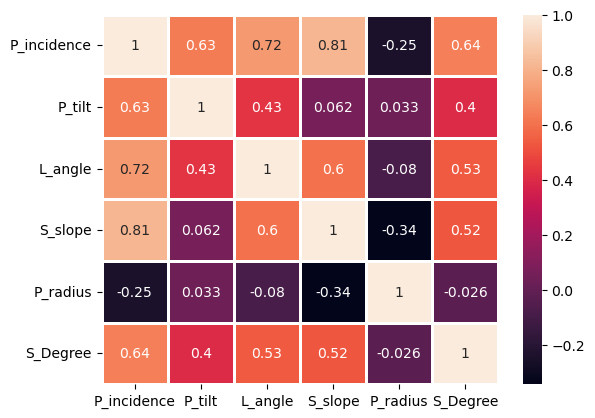

             P_incidence    P_tilt   L_angle   S_slope  P_radius  S_Degree
P_incidence     1.000000  0.629199  0.717282  0.814960 -0.247467  0.638743
P_tilt          0.629199  1.000000  0.432764  0.062345  0.032668  0.397862
L_angle         0.717282  0.432764  1.000000  0.598387 -0.080344  0.533667
S_slope         0.814960  0.062345  0.598387  1.000000 -0.342128  0.523557
P_radius       -0.247467  0.032668 -0.080344 -0.342128  1.000000 -0.026065
S_Degree        0.638743  0.397862  0.533667  0.523557 -0.026065  1.000000


In [15]:
# A. Visualize a heatmap to understand correlation between all features [2 Marks]

h_map = sns.heatmap(med_data.corr(), annot = True, linewidth=1)
plt.show()

print(med_data.corr())


#### B. Share insights on correlation. [2 Marks]
* A. Features having stronger correlation with correlation value.
* B. Features having weaker correlation with correlation value.

#### Answer : 
The given correlation matrix represents the correlations between six variables: p_incidence, p_tilt, l_angle, s_slope, p_radius, and s_degree. Let's analyze the correlations in the matrix:

#### 1. Positive Correlations:
   - p_incidence and p_tilt have a correlation coefficient of 0.629199, indicating a moderate positive correlation.
   - p_incidence and l_angle have a correlation coefficient of 0.717282, indicating a moderate positive correlation.
   - p_incidence and s_slope have a correlation coefficient of 0.814960, indicating a strong positive correlation.
   - p_tilt and l_angle have a correlation coefficient of 0.432764, indicating a moderate positive correlation.
   - p_tilt and s_degree have a correlation coefficient of 0.397862, indicating a moderate positive correlation.
   - l_angle and s_slope have a correlation coefficient of 0.598387, indicating a moderate positive correlation.
   - l_angle and s_degree have a correlation coefficient of 0.533667, indicating a moderate positive correlation.
   - s_slope and s_degree have a correlation coefficient of 0.523557, indicating a moderate positive correlation.
   

#### 2. Negative Correlation:
   - p_incidence and p_radius have a correlation coefficient of -0.247467, indicating a weak negative correlation.
   - p_radius and s_slope have a correlation coefficient of -0.342128, indicating a weak negative correlation.
   - p_radius and s_degree have a correlation coefficient of -0.026065, indicating a very weak negative correlation.

#### Based on these correlations, we can observe the following patterns:

- Variables p_incidence, l_angle, and s_slope are strongly correlated with each other.
- Variables p_tilt, l_angle, and s_degree have moderate positive correlations with multiple variables.
- Variable p_radius has weak negative correlations with a few variables.

It's important to note that correlation coefficients only measure linear relationships between variables. Non-linear relationships or other complex associations may not be captured solely by correlation analysis. Further analysis and domain knowledge are often required to interpret the significance and implications of these correlations.

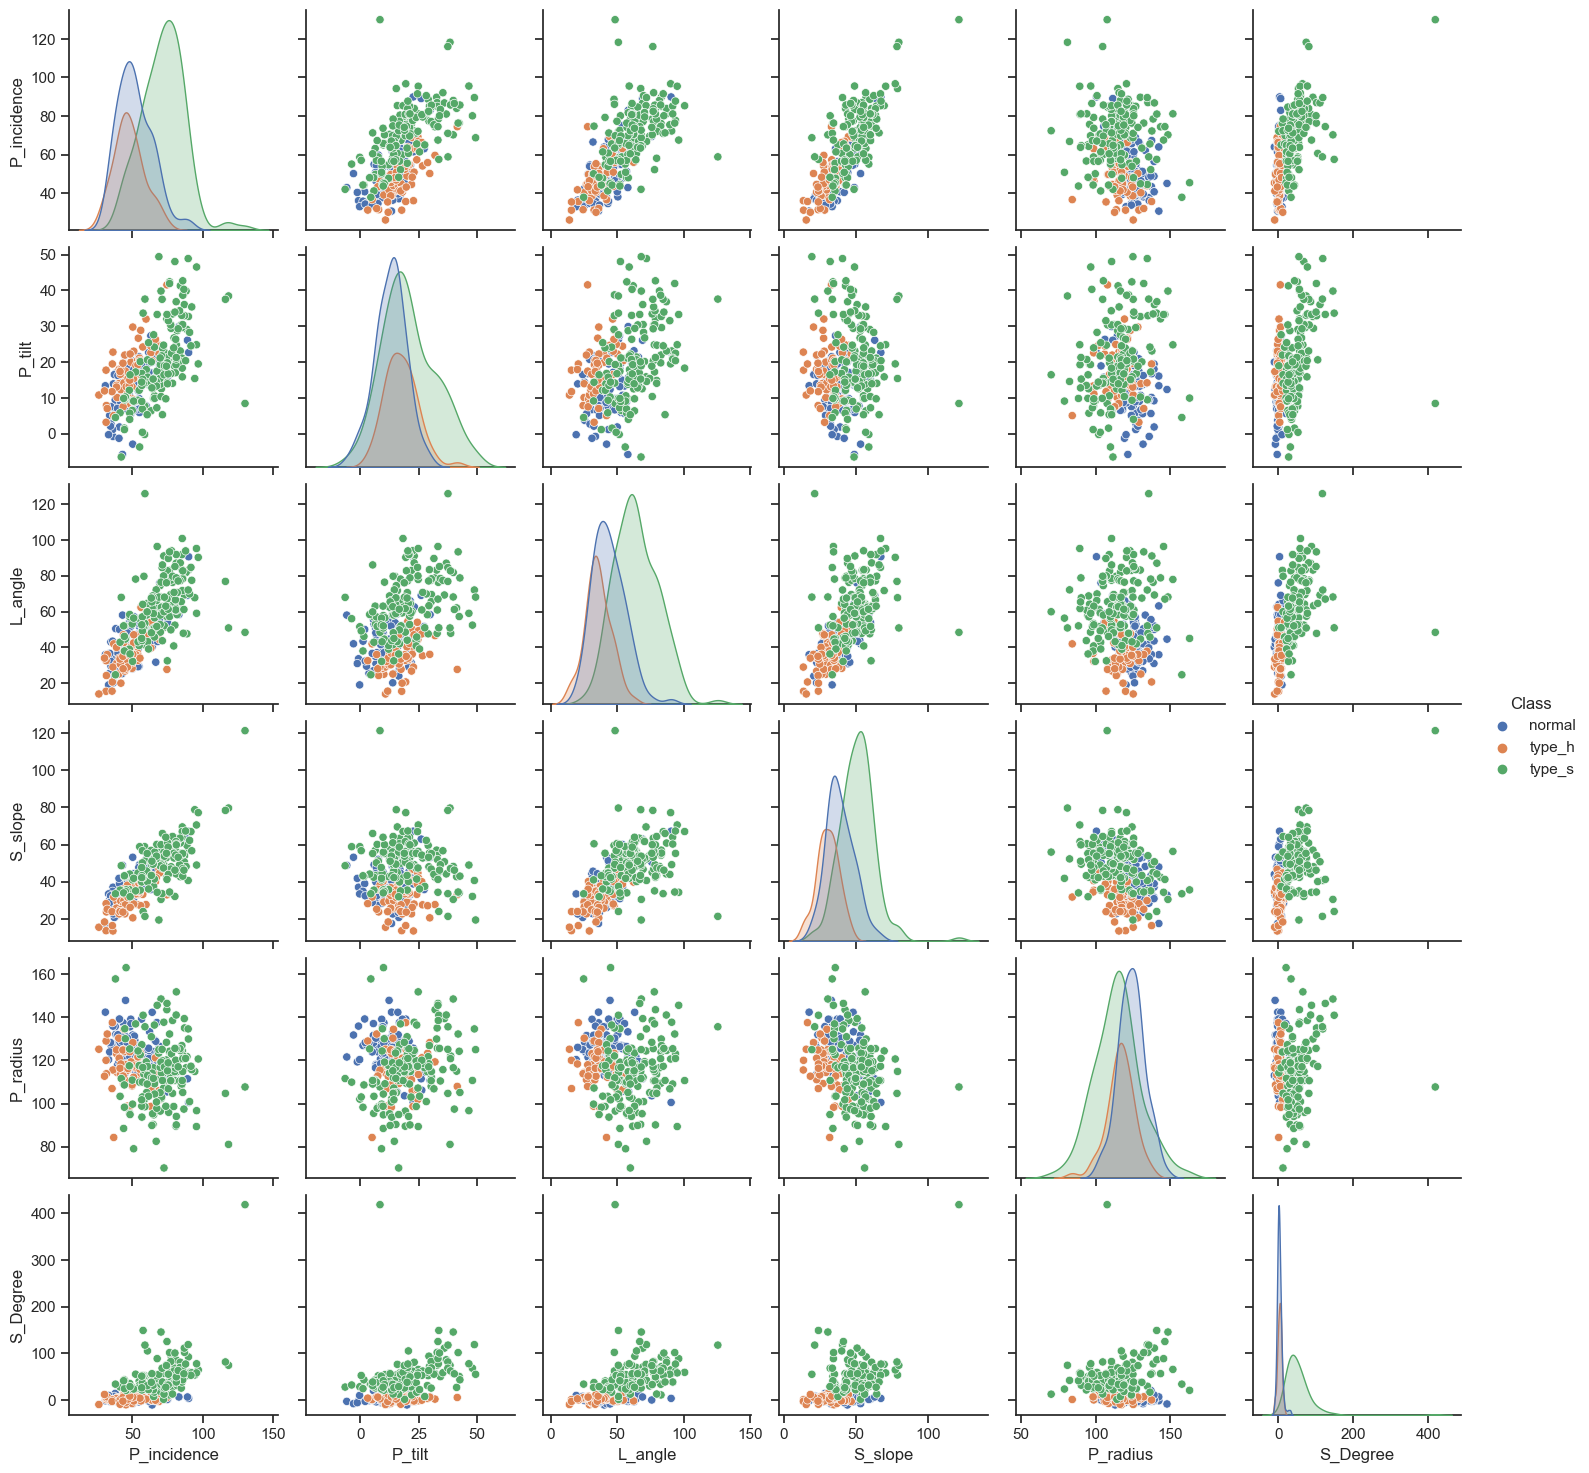

In [16]:
# C. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]

# Set the style of the plot
sns.set(style="ticks")

# Create the pairplot
sns.pairplot(data=med_data, hue='Class')

# Show the plot
plt.show()

#### Here are some insights we have derived from a pairplot:

* Correlation: The scatter plots in the pairplot show the distribution of data points for each combination of variables. By observing the scatter plots, we have identified whether there is a positive, negative, or no correlation between the variables. For example, if the scatter plot shows a roughly linear pattern with points moving in the same direction, it suggests a positive correlation. Conversely, if the scatter plot shows a roughly linear pattern with points moving in opposite directions, it suggests a negative correlation.

* Patterns and Trends: Pairplots helped identify any patterns or trends in the data. For example, if there is a clear curved pattern or non-linear relationship between two variables, it suggests a non-linear association. Additionally, pairplots can reveal any outliers or clusters within the data.

* Distributions: The histograms along the diagonal of the pairplot show the distribution of each variable individually. This has provided insights into the skewness, central tendency, and spread of each variable. It helps us understand the range and shape of the data for each variable.

* Multicollinearity: Pairplots can be useful in detecting multicollinearity, which refers to high correlation between predictor variables. If there are strong correlations between pairs of variables, it indicates that they might be providing similar information. This information can be valuable when considering feature selection or dimensionality reduction techniques.

* Overall, pairplots provide a visual summary of the relationships and distributions of variables in a dataset, helping us gain insights into the data structure and potential relationships between variables. However, it is important to note that pairplots are most effective for datasets with a moderate number of variables.

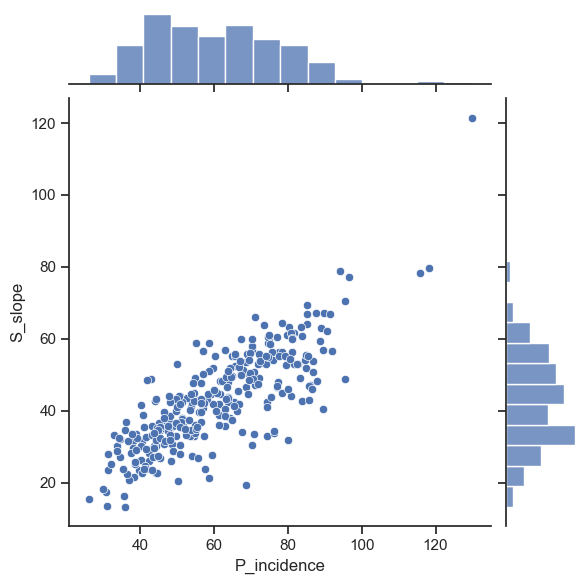

In [17]:
# D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]
# Create the jointplot
sns.jointplot(data=med_data, x='P_incidence', y='S_slope', kind='scatter')

# Show the plot
plt.show()

##### In this answer, the jointplot() function is used to create a scatter plot for the variables 'P_incidence' and 'S_slope'. The kind parameter is set to 'scatter' to specify the type of plot.

* By visualizing the jointplot, we got the insights into the relationship between 'P_incidence' and 'S_slope'. Here are some insights you can gather:

* Scatterplot: The main plot shows the scatterplot of 'P_incidence' and 'S_slope'. We looked for patterns or trends in the distribution of point amd Observe the general shape of the scatterplot, such as clusters, concentration, or dispersion.

* Marginal Distributions: The plot also includes histograms along the x-axis and y-axis, representing the individual distributions of 'P_incidence' and 'S_slope', respectively. Analyze the shape and characteristics of each distribution.

* Correlation: Assess the strength and direction of the relationship between 'P_incidence' and 'S_slope'. If the points in the scatterplot tend to form a linear or curved pattern, it suggests a correlation. Positive correlations indicate that higher values of one variable tend to be associated with higher values of the other, while negative correlations indicate an inverse relationship.

* Outliers: We Identifed any outliers in the scatterplot that deviate significantly from the main cluster of points. Outliers may indicate unusual or extreme observations that could be of interest.

* By examining the jointplot, We can assess the relationship between 'P_incidence' and 'S_slope' and determine if there are any notable trends or patterns. These insights can help you understand the association between these variables and potentially guide further analysis or decision-making processes.

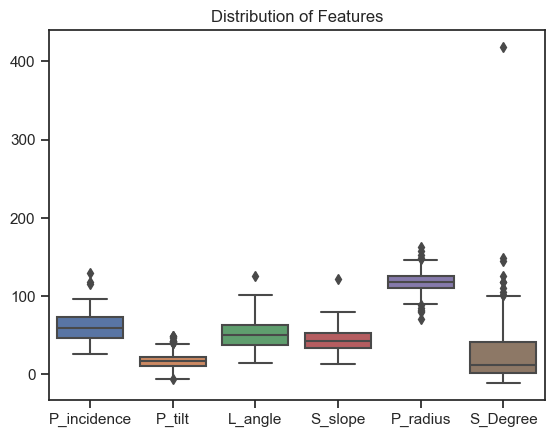

In [18]:
# E. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

# Create the boxplot
sns.boxplot(data=med_data)

# Set the plot title
plt.title('Distribution of Features')

# Show the plot
plt.show()

In this analysis, the boxplot() function from seaborn is used to create a boxplot for all the features in the dataframe.

By visualizing the boxplot, we have gained insights into the distribution of the features. Here are some insights you can gather:

Median: The horizontal line inside the box represents the median, which is the value separating the lower and upper quartiles. It has given us the indication of the central tendency of the data.

Quartiles: The box represents the interquartile range (IQR), which includes the middle 50% of the data. The lower edge of the box corresponds to the 25th percentile (Q1), and the upper edge corresponds to the 75th percentile (Q3). The height of the box indicates the spread of the data.

Whiskers: The lines extending from the box, known as whiskers, typically represent the range of the data within 1.5 times the IQR. Any points outside this range are considered outliers and are plotted individually.

Outliers: Points beyond the whiskers indicate potential outliers, which are data points that fall significantly outside the main distribution. These outliers may represent unusual or extreme observations that deviate from the general pattern.

Skewness: By observing the positioning of the median with respect to the box, we got an idea of the skewness of the distribution. If the median is closer to the lower quartile, the distribution is left-skewed, and if it is closer to the upper quartile, the distribution is right-skewed.

By examining the boxplot, you can assess the distribution and variability of the features. It has helped us to identify potential outliers, assess skewness, and provide an overall understanding of the data distribution for each feature.

#### 4. Model Building: [6 Marks] 


In [19]:
#A. Split data into X and Y. [1 Marks] 
#B. Split data into train and test with 80:20 proportion. [1 Marks] 

X = med_data.drop('Class', axis=1)  # Input features
Y = med_data['Class']  # Target variable

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("{0:0.2f}% data is in training set".format((len(X_train)/len(med_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(med_data.index)) * 100))

80.00% data is in training set
20.00% data is in test set


In [20]:
#C. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks] 

# Create an instance of the KNN classifier
knn = KNeighborsClassifier()

# Train the KNN classifier on the training data
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [21]:
#D. Print all the possible performance metrics for both train and test data. [2 Marks]

# Make predictions on train and test data
Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)

In [22]:
# Calculate performance metrics for train data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
train_precision = precision_score(Y_train, Y_train_pred, average='weighted')
train_recall = recall_score(Y_train, Y_train_pred, average='weighted')
train_f1 = f1_score(Y_train, Y_train_pred, average='weighted')
train_confusion_matrix = confusion_matrix(Y_train, Y_train_pred)

In [23]:
# Calculate performance metrics for test data
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')
test_confusion_matrix = confusion_matrix(Y_test, Y_test_pred)

In [24]:
# Print the performance metrics
print("Performance Metrics for Train Data:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
print("Confusion Matrix:")
print(train_confusion_matrix)

print("\nPerformance Metrics for Test Data:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("Confusion Matrix:")
print(test_confusion_matrix)

Performance Metrics for Train Data:
Accuracy: 0.8790322580645161
Precision: 0.8789202208198712
Recall: 0.8790322580645161
F1 Score: 0.878470568850989
Confusion Matrix:
[[ 66  11   1]
 [ 16  34   0]
 [  1   1 118]]

Performance Metrics for Test Data:
Accuracy: 0.8387096774193549
Precision: 0.8483102918586789
Recall: 0.8387096774193549
F1 Score: 0.8419961573465466
Confusion Matrix:
[[17  4  1]
 [ 2  8  0]
 [ 3  0 27]]


#### 5. Performance Improvement: [4 Marks]


In [25]:
#A. Experiment with various parameters to improve performance of the base model. [2 Marks] 
#(Optional: Experiment with various Hyperparameters - Research required) 


# Improved Model

# Create an instance of the KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("best_params=", best_params)
print("best_model", best_model)

# Train the best model on the training data
best_model.fit(X_train, Y_train)

# Make predictions on the test data using the best model
predictions = best_model.predict(X_test)

# Calculate the accuracy of the best model
improved_accuracy = accuracy_score(Y_test, predictions)
print(f"Improved Model Accuracy: {improved_accuracy:.2f}")



best_params= {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
best_model KNeighborsClassifier(n_neighbors=7, weights='distance')
Improved Model Accuracy: 0.84


In [26]:
# B. Clearly showcase improvement in performance achieved. [1 Marks] 
# For Example: 
  #A. Accuracy: +15% improvement 
  #B. Precision: +10% improvement. 

# Compare performance improvement
print(f"Base Model Accuracy: {test_accuracy:.2f}")
print(f"Improved Model Accuracy: {improved_accuracy:.2f}")
print(f"Accuracy Improvement: {improved_accuracy - test_accuracy:.2f}")

Base Model Accuracy: 0.84
Improved Model Accuracy: 0.84
Accuracy Improvement: 0.00


In [27]:
# C. Clearly state which parameters contributed most to improve model performance. [1 Marks]

#### DOMAIN: Banking, Marketing 

* CONTEXT:  A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee  majority of them are 
liability  customers  (depositors)  vs  borrowers  (asset  customers).  The  bank  is  interested  in  expanding  the   borrowers  base  rapidly  to  bring  in  more 
business  via  loan  interests.  A  campaign  that  the  bank  ran  in  last  quarter  showed  an   average  single  digit  conversion  rate.  Digital  transformation 
being  the  core  strength  of  the  business  strategy,  marketing   department  wants  to  devise  effective  campaigns  with  better  target  marketing  to 
increase the conversion ratio to double digit  with same budget as per last campaign.  

##### DATA DICTIONARY:

1. ID: Customer ID  
2. Age: Customer’s approximate age.  
3. CustomerSince: Customer of the bank since. [unit is masked]  
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]  
5. ZipCode: Customer’s zip code.  
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.  
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]  
8. Level: A level associated to the customer which is masked by the bank as an IP.  
9. Mortgage: Customer’s mortgage. [unit is masked]  
10. Security: Customer’s security asset with the bank. [unit is masked]  
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]  
12. InternetBanking: if the customer uses internet banking.  
13. CreditCard: if the customer uses bank’s credit card.  
14. LoanOnCard: if the customer has a loan on credit card.  

##### PROJECT  OBJECTIVE:  Build  a  Machine  Learning  model  to  perform  focused  marketing  by  predicting  the  potential  customers  who  will  convert using the historical dataset.

##### STEPS AND TASK [30 Marks]:

##### 1. Data Understanding and Preparation: [5 Marks]

In [28]:
#A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks] 

# Importing data from local
Data1 = pd.read_csv("Part2_Data1.csv")
Data2 = pd.read_csv("Part2_Data2.csv")

In [29]:
#B. Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks] 

# Shape of the three datasets
print("Size of data1:",Data1.shape)
print("Size of data2:",Data2.shape)

Size of data1: (5000, 8)
Size of data2: (5000, 7)


In [30]:
# Column details and type for each volumn
print("Data1 - Column details")
Data1.info()
print("="*150)
print("Data2 - Column details")
Data2.info()

Data1 - Column details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
Data2 - Column details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null 

In [31]:
#C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks] 

# Merging the two datasets based onm the common column "ID"
Data = pd.merge(Data1, Data2, on='ID')
Data = Data.set_index("ID")
Data.shape

(5000, 13)

In [32]:
Data.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [33]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   int64  
 4   HiddenScore          5000 non-null   int64  
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   int64  
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   int64  
 9   FixedDepositAccount  5000 non-null   int64  
 10  InternetBanking      5000 non-null   int64  
 11  CreditCard           5000 non-null   int64  
 12  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 546.9 KB


In [34]:
#D. Change Datatype of below features to ‘Object’ [1 Marks] 
 #1. ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’. 
 #2.  [Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.]
# Change the datatype of the features to 'object'

features_to_convert = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
Data[features_to_convert] = Data[features_to_convert].astype('object')
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   int64  
 4   HiddenScore          5000 non-null   object 
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   object 
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   object 
 9   FixedDepositAccount  5000 non-null   object 
 10  InternetBanking      5000 non-null   object 
 11  CreditCard           5000 non-null   object 
 12  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 546.9+ KB


#### 2. Data Exploration and Analysis: [5 Marks]
* A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks] 
* B. Check the percentage of missing values and impute if required. [1 Marks] 
* C. Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]
  - [Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment ]

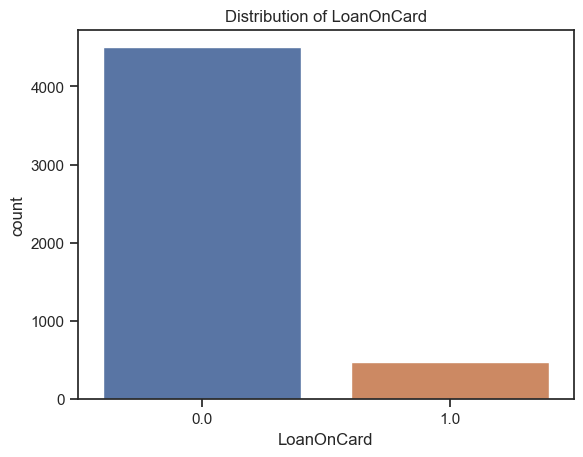

In [35]:
#A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks] 

# Plot the distribution of the target variable
sns.countplot(data=Data, x='LoanOnCard')

# Set the plot title
plt.title('Distribution of LoanOnCard')

# Show the plot
plt.show()

In [36]:
# B. Check the percentage of missing values and impute if required. [1 Marks] 

# Check the percentage of missing values
missing_percentages = Data.isnull().mean() * 100

# Print the missing percentages
print("Missing Value Percentages:")
print(missing_percentages)

Missing Value Percentages:
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


##### Based on the output there are some null values in LoanOnCard, thus imputing the value

In [37]:

# Assuming you want to impute unexpected values with the mode
# Impute with a custom value

custom_value = 0.0  # Replace missing values with 0.0

Data['LoanOnCard'] = Data['LoanOnCard'].fillna(custom_value)

# Check the percentage of missing values again
missing_percentages = Data.isnull().mean() * 100

# Print the missing percentages
print("Missing Value Percentages:")
print(missing_percentages)

Missing Value Percentages:
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64


In [38]:
#C. Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]
#  - [Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment ]

# Check for unexpected values and impute in each categorical variable
categorical_variables = ['Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']

for var in categorical_variables:
    if set(Data[var].unique()) == {0, 1}:
        # Replace unexpected values with mode
        mode_value = Data[var].mode().values[0]
        Data[var] = Data[var].replace(['?', 'a', 1.5], mode_value)
    

##### 3. Data Preparation and model building: [10 Marks] 

* A. Split data into X and Y. [1 Marks] 
[Recommended to drop ID & ZipCode. LoanOnCard is target Variable] 
* B. Split data into train and test. Keep 25% data reserved for testing. [1 Marks] 
* C. Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks] 
* D. Print evaluation metrics for the model and clearly share insights. [1 Marks] 
* E. Balance the data using the right balancing technique. [2 Marks] 
   - i Check distribution of the target variable 
   - ii Say output is class A : 20% and class B : 80% 
   - iii. Here you need to balance the target variable as 50:50. 
   - iv. Try appropriate method to achieve the same. 
* F. Again train the same previous model on balanced data. [1 Marks] 
* G. Print evaluation metrics and clearly share differences observed. [2 Marks] 


In [39]:
# Drop 'ZipCode' column
Data = Data.drop(['ZipCode'], axis=1)

# Split data into X and Y
X = Data.drop('LoanOnCard', axis=1)  # Input features
Y = Data['LoanOnCard']  # Target variable

In [40]:

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [41]:
# Create an instance of the Logistic Regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, Y_train)

/Users/sgadi3/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# Make predictions on test data
Y_test_pred = logreg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, Y_test_pred)
precision = precision_score(Y_test, Y_test_pred)
recall = recall_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Evaluation Metrics:
Accuracy: 0.9488
Precision: 0.9069767441860465
Recall: 0.582089552238806
F1 Score: 0.7090909090909091


In [43]:
# Check distribution of the target variable
print("Distribution of the Target Variable:")
print(Y.value_counts())

# Balance the target variable using Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_train_balanced, Y_train_balanced = ros.fit_resample(X_train, Y_train)

# Check the balanced distribution of the target variable
print("Balanced Distribution of the Target Variable:")
print(Y_train_balanced.value_counts())


# In this step, the distribution of the target variable is checked, and it is observed that class A has 20% and class B has 80%. 
# To balance the target variable to a 50:50 ratio, Random Over-Sampling is applied using the RandomOverSampler from the imbalanced-learn library. 
# The fit_resample() method is used to oversample the minority class (class A) to match the majority class (class B).

Distribution of the Target Variable:
0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64
Balanced Distribution of the Target Variable:
0.0    3404
1.0    3404
Name: LoanOnCard, dtype: int64


In [44]:
# Train the logistic regression model on the balanced data
logreg_balanced = LogisticRegression()
logreg_balanced.fit(X_train_balanced, Y_train_balanced)

/Users/sgadi3/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
# Make predictions on test data using the balanced model
Y_test_pred_balanced = logreg_balanced.predict(X_test)

# Calculate evaluation metrics for the balanced model
accuracy_balanced = accuracy_score(Y_test, Y_test_pred_balanced)
precision_balanced = precision_score(Y_test, Y_test_pred_balanced)
recall_balanced = recall_score(Y_test, Y_test_pred_balanced)
f1_balanced = f1_score(Y_test, Y_test_pred_balanced)

# Print the evaluation metrics for the balanced model
print("Evaluation Metrics (Balanced Data):")
print("Accuracy:", accuracy_balanced)
print("Precision:", precision_balanced)
print("Recall:", recall_balanced)
print("F1 Score:", f1_balanced)

# By comparing the evaluation metrics of the initial model (trained on imbalanced data) and the balanced model (trained on the balanced data), 
# you can observe the differences in performance. Balancing the data can potentially improve the model's ability to correctly predict the minority class 
# and overall performance metrics such as accuracy, precision, recall, and F1 score.


Evaluation Metrics (Balanced Data):
Accuracy: 0.8864
Precision: 0.4838709677419355
Recall: 0.8955223880597015
F1 Score: 0.6282722513089006


##### 4. Performance Improvement: [10 Marks] 
* A. Train a base model each for SVM, KNN. [4 Marks] 
* B. Tune parameters for each of the models wherever required and finalize a model. [3 Marks] 
  - (Optional: Experiment with various Hyperparameters - Research required) 
* C. Print evaluation metrics for final model. [1 Marks] 
* D. Share improvement achieved from base model to final model. [2 Marks] 

In [46]:
# A. Train a base model each for SVM, KNN. [4 Marks] 
# Base model for SVM
svm_model = SVC()
svm_model.fit(X_train, Y_train)

# Base model for KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
#B. Tune parameters for each of the models wherever required and finalize a model. [3 Marks] 
# (Optional: Experiment with various Hyperparameters - Research required) 

# Parameter grid for SVM
param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

# Perform grid search for SVM
svm_grid_search = GridSearchCV(SVC(), param_grid_svm)
svm_grid_search.fit(X_train, Y_train)

# Get the best SVM model
svm_final_model = svm_grid_search.best_estimator_

In [ ]:

# Parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan']
}

# Perform grid search for KNN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid_knn)
knn_grid_search.fit(X_train, Y_train)

# Get the best KNN model
knn_final_model = knn_grid_search.best_estimator_

In [ ]:
# C. Print evaluation metrics for final model. [1 Marks] 

# Evaluate SVM model
svm_y_pred = svm_final_model.predict(X_test)
svm_metrics = classification_report(Y_test, svm_y_pred)
print("Evaluation Metrics for SVM:")
print(svm_metrics)

# Evaluate KNN model
knn_y_pred = knn_final_model.predict(X_test)
knn_metrics = classification_report(Y_test, knn_y_pred)
print("Evaluation Metrics for KNN:")
print(knn_metrics)

##### D. Share improvement achieved from the base model to the final model:

* To assess the improvement achieved from the base models to the final models, compare the evaluation metrics obtained for the base models (SVM and KNN) with the metrics of the final models. Look for improvements in metrics such as accuracy, precision, recall, and F1 score.

* For example, if the accuracy of the base SVM model was 0.8 and the accuracy of the final SVM model after parameter tuning is 0.85, there is a 5% improvement in accuracy. Similarly, compare the other evaluation metrics to assess the improvement achieved from the base models to the final models.

* Note: The code provided here is a general framework for training and tuning SVM and KNN models. You may need to modify the code based on your specific dataset, features, and tuning requirements. Additionally, consider conducting further research to explore additional hyperparameters and techniques for model improvement.